In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,classification_report,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('loan_approval_dataset.csv')
data.shape

(4269, 13)

In [4]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Check for missing values
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Number of Numerical & Categorical columns

In [6]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 10


In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))

Categorical Columns: 3


## Convert Categorical features to Numerical 

In [8]:
lb = LabelEncoder()
for col in categorical_cols:
    data[col] = lb.fit_transform(data[col])

In [9]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


### Data Splitting

In [10]:
X = data.drop(columns=['loan_id', ' loan_status'])
y = data[' loan_status']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Random Forest Model

In [12]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print(f'ROC score: {roc_auc_score(y_test,y_pred)*100:.2f}')
print(f'Precision score:{precision_score(y_test,y_pred):.2f}')
print(f'Recall score: {recall_score(y_test,y_pred):.2f}')
print(f'F1-score: {f1_score(y_test,y_pred):.2f}')

Accuracy: 97.81%
ROC score: 97.47
Precision score:0.98
Recall score: 0.96
F1-score: 0.97


### Confusion Matrix

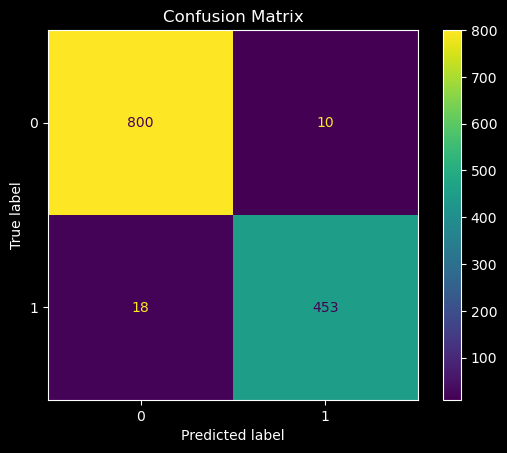

In [18]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [19]:
print('Classification Report\n',classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [30]:
performance = pd.DataFrame({'model':['Random Forest', ],
                            'Accuracy':[' 97.81%'],'ROC score': [97.34],'Precision Score':[0.98],
                            'Recal Score':[0.96],'F1 Score':[0.97]})
performance

,model,Accuracy,ROC score,Precision Score,Recal Score,F1 Score
0,Random Forest,97.81%,97.34,0.98,0.96,0.97
